In [5]:
import cv2
import numpy as np

def binarize(img_pil):
    #https://stackoverflow.com/questions/61918194/how-to-make-a-binary-mask-out-of-an-image-with-a-transparent-background
    # load image with alpha channel
    #img = cv2.imread('object.png', cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGBA2BGRA)

    # extract alpha channel
    alpha = img[:, :, 3]

    # threshold alpha channel
    alpha = cv2.threshold(alpha, 0, 255, cv2.THRESH_BINARY)[1]

    return alpha

### Remove background + binarize + skeletonize

In [11]:
# Importing Required Modules
from rembg import remove
from PIL import Image
from skimage.morphology import skeletonize
from skimage.io import imsave
from skimage.util import img_as_ubyte
import os
import glob

# Root directory ControlNet-Trees
ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')

def get_files_folder(path):
    image_list = []
    for filename in glob.glob(os.path.join(path,'*')):
        im=filename #Image.open(filename)
        image_list.append(im)
    return image_list
  
def run_training_data_pipeline(input_path):

    img_nr = input_path.split(".")[-2][-1]
    
    # Store path of the output image in the variable output_path
    output_folder = os.path.join(ROOT_DIR_GIS,'photos','tree_skeleton')
    output_path_bg = os.path.join(output_folder, f'tree{img_nr}_rembg.png')
    output_path_bin = os.path.join(output_folder, f'tree{img_nr}_binary.png')
    output_path_skel = os.path.join(output_folder, f'tree{img_nr}_skel.png')
    
    # Processing the image
    input = Image.open(input_path)
    
    # Removing the background
    output = remove(input)
    output.save(output_path_bg)

    # Binarize
    output = binarize(output)
    cv2.imwrite(output_path_bin, output)

    # Skeletonize
    skeleton = skeletonize(output)
    imsave(output_path_skel, img_as_ubyte(skeleton))


In [12]:
# Only first image
run_training_data_pipeline(os.path.join(ROOT_DIR_GIS,'photos','tree','tree0.jpeg'))

In [ ]:
in_folder = os.path.join(ROOT_DIR_GIS, 'photos','tree')
img_list = get_files_folder(in_folder)
for img in img_list:
    try:
        print(run_training_data_pipeline(img))
    except Exception as error:
        print("An error occurred:", error)

### Compare diff skel algos
https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html

In [16]:
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
from skimage.io import imread


def compare_skel_algos(img_nr):
    output_path_bin = os.path.join(ROOT_DIR_GIS, 'photos','tree_skeleton',f'tree{img_nr}_binary.png')
    img = imread(output_path_bin)

    # Compute the medial axis (skeleton) and the distance transform
    skel, distance = medial_axis(img, return_distance=True)

    # Compare with other skeletonization algorithms
    skeleton = skeletonize(img)
    skeleton_lee = skeletonize(img, method='lee')

    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel

    fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    #ax[1].imshow(dist_on_skel, cmap='magma')
    #ax[1].contour(img, [0.5], colors='w')
    ax[1].imshow(skel, cmap=plt.cm.gray)
    ax[1].set_title('medial_axis')
    ax[1].axis('off')

    ax[2].imshow(skeleton, cmap=plt.cm.gray)
    ax[2].set_title('skeletonize')
    ax[2].axis('off')

    ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[3].set_title("skeletonize (Lee 94)")
    ax[3].axis('off')

    fig.tight_layout()
    plt.show()

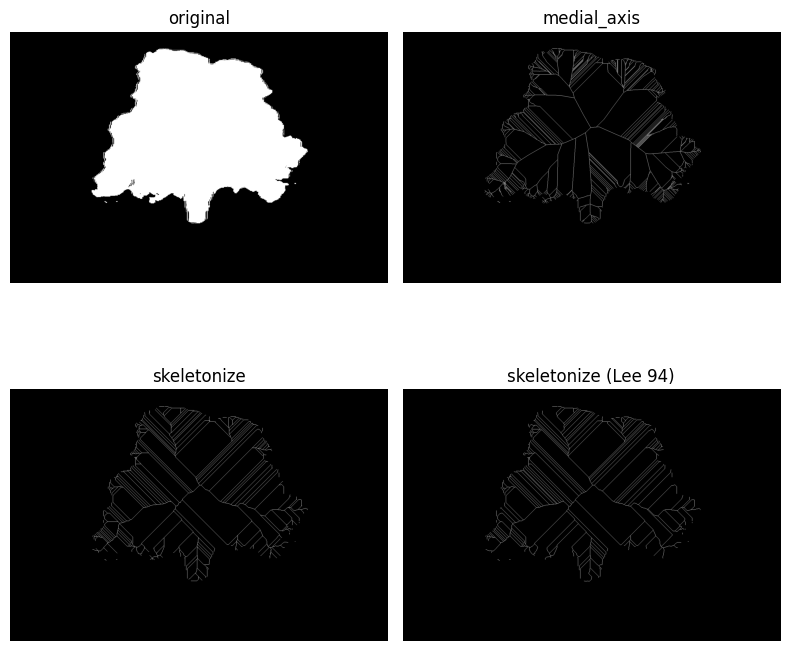

In [20]:
compare_skel_algos(5)

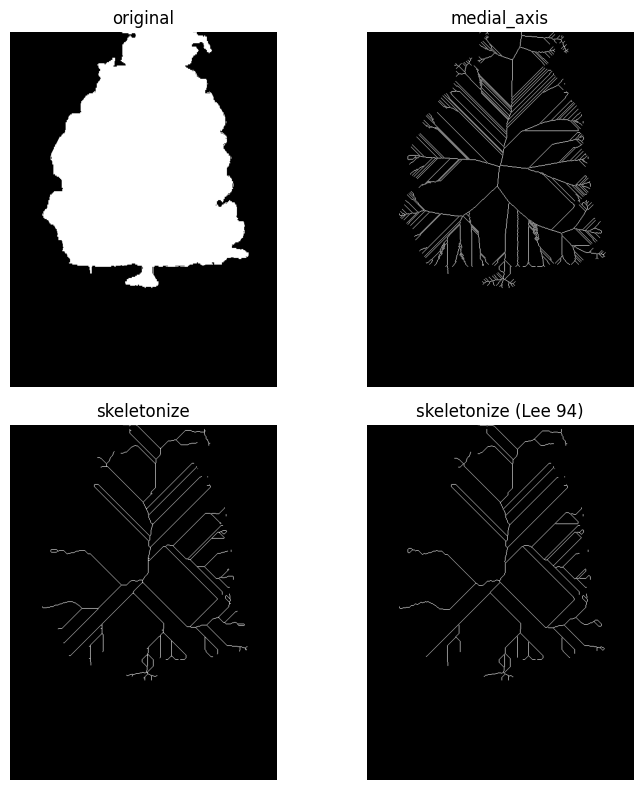

In [28]:
compare_skel_algos(0)